
# Decision Tree Regression with AdaBoost

A decision tree is boosted using the AdaBoost.R2 [1]_ algorithm on a 1D
sinusoidal dataset with a small amount of Gaussian noise.
299 boosts (300 decision trees) is compared with a single decision tree
regressor. As the number of boosts is increased the regressor can fit more
detail.

.. [1] [H. Drucker, "Improving Regressors using Boosting Techniques", 1997.](https://citeseerx.ist.psu.edu/doc_view/pid/8d49e2dedb817f2c3330e74b63c5fc86d2399ce3)


## Preparing the data
First, we prepare dummy data with a sinusoidal relationship and some gaussian noise.



In [1]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause
import numpy as np
import pandas as pd

# # 读取Excel文件
# df = pd.read_excel('out1.xlsx')

# # 对每一列进行插值处理
# for column in df.columns:
#     values = df[column]

#     # 使用interpolate()函数进行插值计算
#     interpolated_values = values.interpolate()

#     # 将插值后的数据覆盖原始数据
#     df[column] = interpolated_values

# # 将结果写入新的Excel文件
# output_file_name = 'output_excel.xlsx'  # 新的输出文件名
# df.to_excel(output_file_name, index=False)



rng = np.random.RandomState(1)
X = np.linspace(0, 7, 7)[:, np.newaxis]
y = np.array([-0.7316,
-0.70241,
-0.65993,
-0.61505,
-0.53156,
-0.39778,
-0.13314
])

## Training and prediction with DecisionTree and AdaBoost Regressors
Now, we define the classifiers and fit them to the data.
Then we predict on that same data to see how well they could fit it.
The first regressor is a `DecisionTreeRegressor` with `max_depth=4`.
The second regressor is an `AdaBoostRegressor` with a `DecisionTreeRegressor`
of `max_depth=4` as base learner and will be built with `n_estimators=300`
of those base learners.



In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

X = np.linspace(0,9,9)[:,np.newaxis]
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

KeyboardInterrupt: 

## Plotting the results
Finally, we plot how well our two regressors,
single decision tree regressor and AdaBoost regressor, could fit the data.



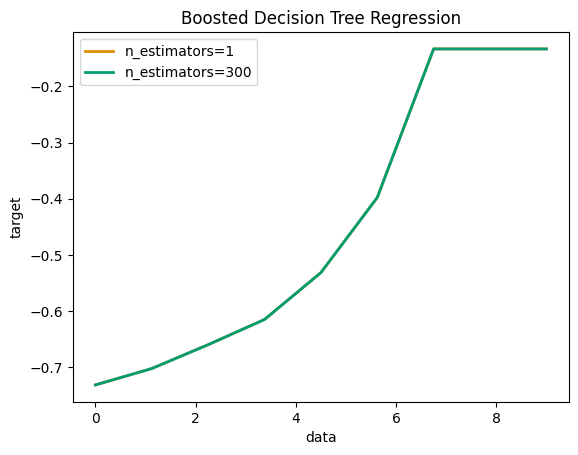

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
# plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

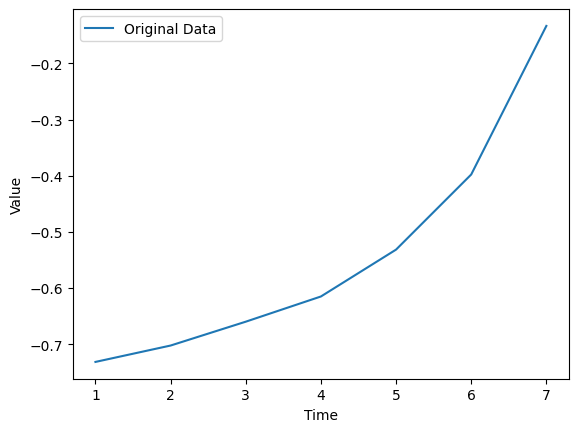

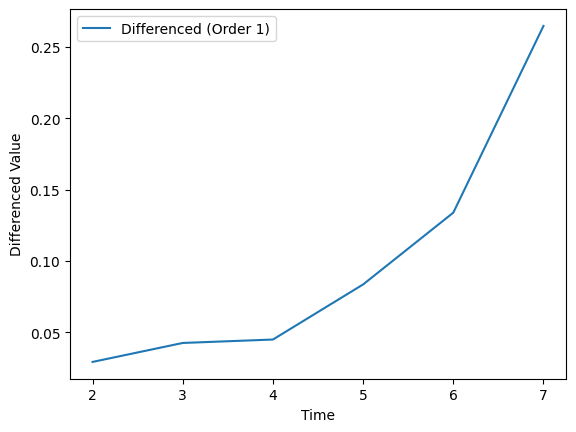

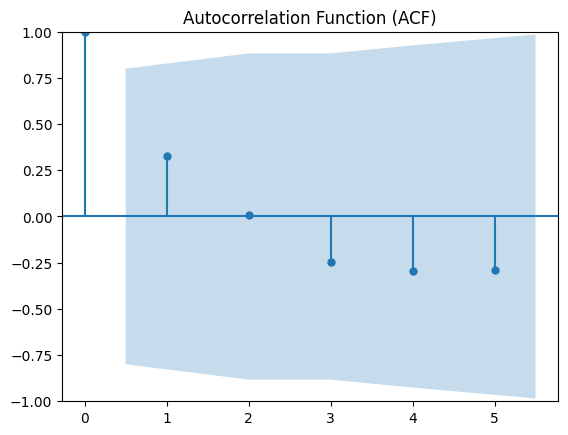

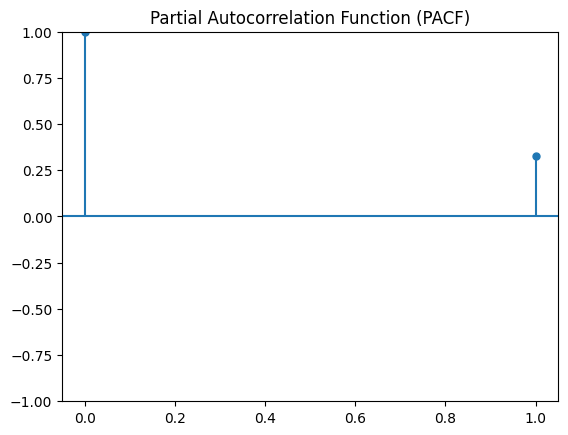

                               SARIMAX Results                                
Dep. Variable:                   Data   No. Observations:                    7
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   7.372
Date:                Sun, 26 Nov 2023   AIC                             -8.745
Time:                        19:56:12   BIC                             -9.370
Sample:                             0   HQIC                           -11.246
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9051      0.319      2.840      0.005       0.280       1.530
ma.L1          0.4749      1.918      0.248      0.805      -3.285       4.235
sigma2         0.0032      0.002      1.428      0.1

d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


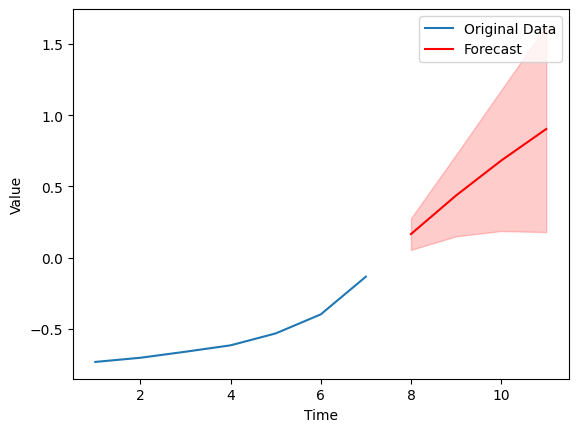

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 生成示例时间序列数据
np.random.seed(42)
time = np.arange(1, 8)
data = np.array([-0.7316,
-0.70241,
-0.65993,
-0.61505,
-0.53156,
-0.39778,
-0.13314
])

# 构建时间序列DataFrame
df = pd.DataFrame({'Time': time, 'Data': data})

# 绘制原始时间序列图
plt.plot(df['Time'], df['Data'], label='Original Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# 检查平稳性并进行差分
diff_order = 1  # 可根据需要调整差分的阶数
df['Differenced'] = df['Data'].diff(diff_order)

# 绘制差分后的时间序列图
plt.plot(df['Time'], df['Differenced'], label=f'Differenced (Order {diff_order})')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

# 绘制ACF和PACF图
plot_acf(df['Differenced'].dropna(), lags=5)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['Differenced'].dropna(), lags=1)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# 拟合ARIMA模型
p, d, q = 1, 1, 1  # ARIMA模型的阶数，可以根据ACF和PACF图来选择
model = ARIMA(df['Data'], order=(p, d, q))
results = model.fit()

# 打印模型概要
print(results.summary())

# 预测未来值
future_steps = 100  # 可根据需要调整预测的步数
forecast = results.get_forecast(steps=future_steps)

# 提取预测结果
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 绘制原始数据及预测结果
plt.plot(df['Time'], df['Data'], label='Original Data')
plt.plot(np.arange(8, 8 + future_steps), forecast_mean, color='red', label='Forecast')
plt.fill_between(np.arange(8, 8 + future_steps), forecast_ci['lower Data'], forecast_ci['upper Data'], color='red', alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
